In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print('Training Data: ', train_images.shape, train_labels.shape)
print('Testing Data: ', test_images.shape, test_labels.shape)

Training Data:  (60000, 28, 28) (60000,)
Testing Data:  (10000, 28, 28) (10000,)


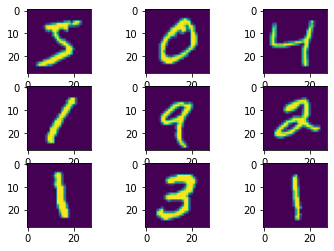

In [ ]:
for i in range(0,9):
  plt.subplot(330+1+i)
  plt.imshow(train_images[i])

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
mod = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mod.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = mod.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 10.6009 - acc: 0.2151
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 9.8924 - acc: 0.1251
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.8918 - acc: 0.1143
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 9.8917 - acc: 0.1093
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 9.8916 - acc: 0.1023


In [ ]:
mod.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0881 - acc: 0.9725


[0.08808070421218872, 0.9725000262260437]

Text(0.5, 1.0, 'Training Loss')

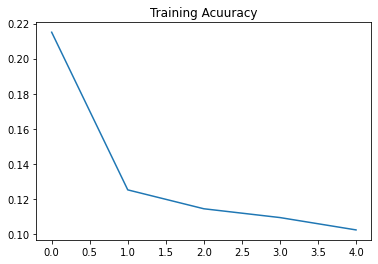

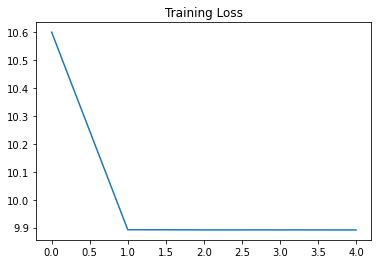

In [ ]:
accuracy = history.history['acc']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy)
plt.title('Training Acuuracy')

plt.figure()

loss = history.history['loss']
plt.plot(epochs, loss)
plt.title('Training Loss')

In [ ]:
import numpy as np
pred = mod.predict(test_images)
pred = [np.argmax(x) for x in pred]

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.95      0.97      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
classes = ['0','1','2','3','4','5','6','7','8','9']
con_mat=confusion_matrix(test_labels,pred)
print(con_mat)

[[ 972    0    1    1    1    0    3    0    2    0]
 [   0 1127    2    1    0    1    2    0    2    0]
 [  10    4  987    6    3    0    1    4   17    0]
 [   2    0    4  985    0    7    0    4    6    2]
 [   2    0    3    1  949    0    6    1    2   18]
 [   5    0    0   15    1  857    9    0    5    0]
 [   9    3    0    1    1    2  940    0    1    1]
 [   1    7    8    8    0    0    0  995    2    7]
 [   6    0    2    8    3    1    3    2  948    1]
 [   4    6    0    9   12    3    0    2    8  965]]
